In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('dark_background')
import matplotlib
%matplotlib inline
import os
import datetime as dt 

from sklearn.metrics import mean_squared_error

In [3]:
# Setting up datetime object of that fateful day
the_decision = dt.datetime(2010, 7,8, 0,0,0)
rudy_gobert = dt.datetime(2020, 12, 12, 0,0,0) # Date when Rudy Gobert gave everybody COVID

In [4]:
# Reading in our dataset -- produced by get_job_data script
data_path = os.path.join(".", "data", "job_quits_formatted.csv")
df = pd.read_csv(data_path)

In [5]:

df.head()

,Unnamed: 0,year,period,series_id,value,total_quits
0,0,2000,M12,JTU000000000000000QUL,2331,2331000
1,1,2001,M01,JTU000000000000000QUL,3425,3425000
2,2,2001,M02,JTU000000000000000QUL,2472,2472000
3,3,2001,M03,JTU000000000000000QUL,2615,2615000
4,4,2001,M04,JTU000000000000000QUL,3312,3312000


In [6]:
# Cleaning the dataset a bit
df['month'] = df['period'].str.replace("M", "")  # replacing mont codes with just month #
df['date'] = df['year'].astype(str) + "-" + df['month']
df['date'] = pd.to_datetime(df['date'], format='%Y-%m')

In [7]:
# Getting separate sub dfs for post and post decision
post_decision = df.loc[df['date'] > the_decision]
pre_decision = df.loc[df['date'] < the_decision]

In [8]:
# Getting Avg # of jobs quit per month post and post decision
avg_quits_pre = int(pre_decision['total_quits'].mean())
avg_quits_post = int(post_decision['total_quits'].mean())
print("Avg # of Jobs quit per month (Pre/Post Decision):")
print(f"Pre-Decision: {avg_quits_pre}")
print(f'Post-Decision: {avg_quits_post}')

Avg # of Jobs quit per month (Pre/Post Decision):
Pre-Decision: 2544801
Post-Decision: 2830244


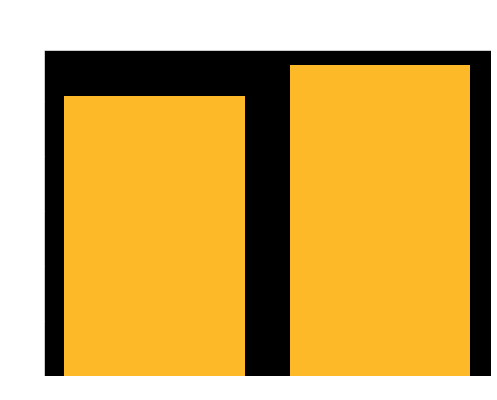

In [9]:
f, ax = plt.subplots(figsize=(8,6))
ax.bar(['Pre-Decision', 'Post-Decision'], [avg_quits_pre, avg_quits_post], color='#FDB927')
ax.set_ylabel('Avg Job Quits per month (in millions)')
f.suptitle(r'Avg # of Jobs Quit per month before and after The Decision')

f.savefig(os.path.join("img", "barplot_pre&post_quits.png"))

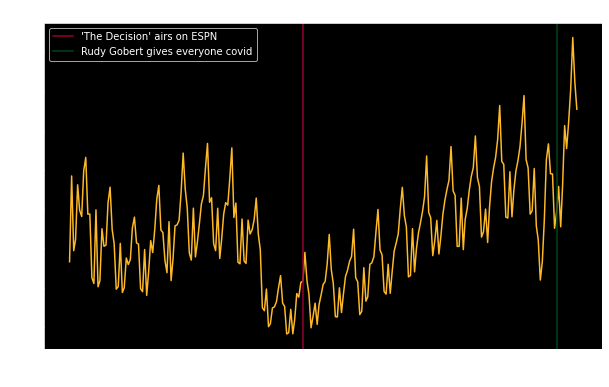

In [10]:
# Plotting line graph of quits with decision airdate in red
f,ax = plt.subplots(figsize=(10,6))
ax.plot(df['date'], df['total_quits'], c='#FDB927')
ax.set_xlabel('Time (mo)')
ax.set_ylabel("# of Job Quits (in thousands)")
ax.set_title("Did LeBron James cause the Great Resignation?")
plt.axvline(the_decision, c='#98002E', label="'The Decision' airs on ESPN")
plt.axvline(rudy_gobert, c='#00471b', label='Rudy Gobert gives everyone covid')
ax.legend()
plt.show()

f.savefig(os.path.join("img", "time_series_jobquits.png"))

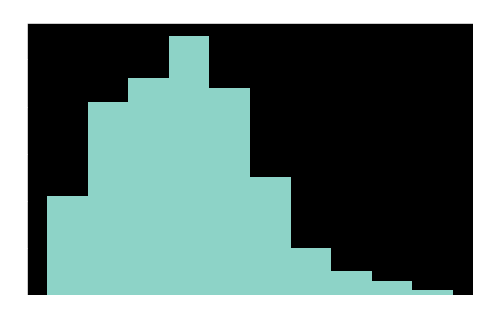

In [11]:
# Let's look at a histogram of job quits 
f, ax = plt.subplots(figsize=(8,5))
ax.hist(df['total_quits'])
ax.set_title('# of Months with a certain # of job quits')
ax.set_xlabel('# of Job Quits in a month')
plt.show()


In [12]:
# Testing job quits time series for statistical significance
# Want to see change in trendline for pre and post-decision periods
from scipy.optimize import curve_fit

In [13]:
def linModel(m,x,b):
    return m*x + b

In [14]:
# Pre-decision model
pre_decision['timestamp'] = pre_decision['date'].view('int64')

# Generating fit from datetime/quits series
fitCoeffs_pre, fitCovariances_pre = curve_fit(linModel, pre_decision.timestamp, pre_decision.total_quits)

print(fitCoeffs_pre, fitCovariances_pre)

m_pre = fitCoeffs_pre[0]
b_pre = fitCoeffs_pre[1]

# Post-decision model
post_decision['timestamp'] = post_decision['date'].view('int64')

# Generating fit from datetime/quits series
fitCoeffs_post, fitCovariances_post = curve_fit(linModel, post_decision.timestamp, post_decision.total_quits)

print(fitCoeffs_post, fitCovariances_post)

m_post = fitCoeffs_post[0]
b_post = fitCoeffs_post[1]

[-2.20508459e-12  5.02948885e+06] [[ 3.08468740e-25 -3.47582272e-07]
 [-3.47582272e-07  3.94047317e+11]]
[ 5.59582230e-12 -5.32196436e+06] [[ 1.53808493e-25 -2.24074119e-07]
 [-2.24074119e-07  3.28055278e+11]]


/Users/andrewbowen/sideProjects/greatResignation/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/andrewbowen/sideProjects/greatResignation/env/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


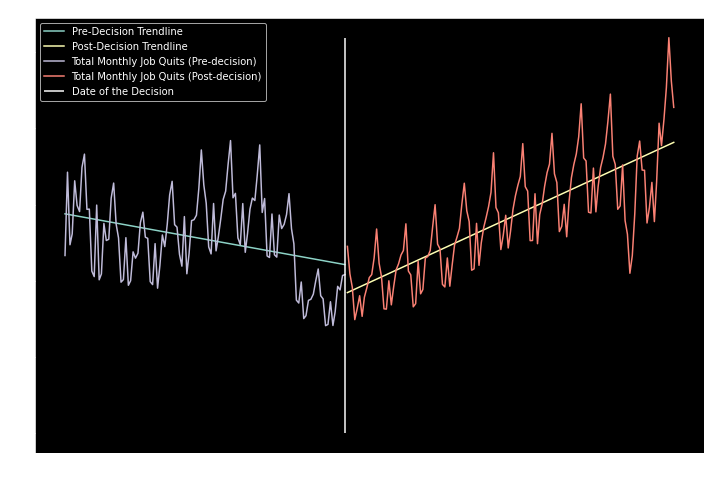

In [15]:
f,ax = plt.subplots(figsize=(12,8))
ax.plot(pre_decision['date'], linModel(m_pre, pre_decision.timestamp, b_pre), label='Pre-Decision Trendline')
ax.plot(post_decision['date'], linModel(m_post, post_decision.timestamp, b_post), label='Post-Decision Trendline')

# Plot actual job quit numbers with models
ax.plot(pre_decision['date'], pre_decision['total_quits'], label='Total Monthly Job Quits (Pre-decision)')
ax.plot(post_decision['date'], post_decision['total_quits'], label='Total Monthly Job Quits (Post-decision)')

ax.vlines(the_decision, ymin=0, ymax=np.max(df['total_quits']), label='Date of the Decision')

ax.set_xlabel('Year')
ax.set_ylabel('Job Quits (in millions)')
ax.legend()


In [16]:
# Printing out 

print(f'Linear model slope pre-Decision: {m_pre}')
print(f'Linear model slope post-Decision: {m_post}')

Linear model slope pre-Decision: -2.205084589159674e-12
Linear model slope post-Decision: 5.5958223009913655e-12


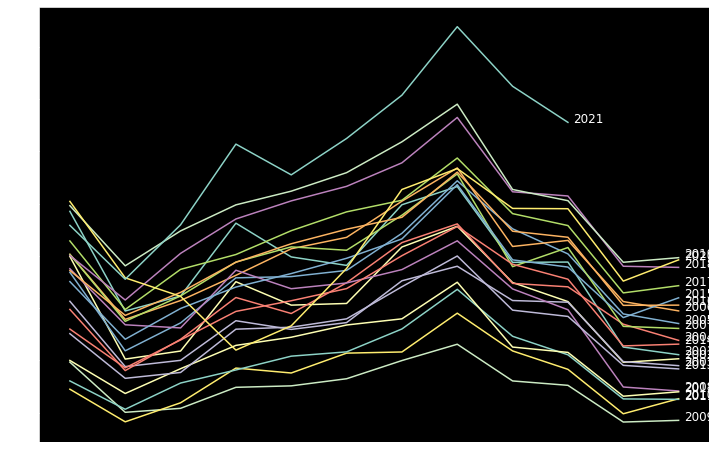

In [17]:
# Checking any seasonal veriability -- plotting quits each year in the same plot

df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

plt.figure(figsize=(12,8))
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12)#, color=mycolors[i])
        # plt.legend()

In [18]:
# Great tutorial on time-series modeling with python here:
# https://www.youtube.com/watch?v=e8Yw4alG16Q&t=292s
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller, kpss



In [19]:
# Using dickey-Fuller test to see if our dataset is stationary
# Spolier alert: it's not
adcf  = adfuller(df.total_quits.values)
print(adcf)
print(f'ACDF Test-Statistics: {adcf[0]}')
print(f'p-value: {adcf[1]}')
print("----------")
for key, value in adcf[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

(-0.7764955707707315, 0.825929012920684, 12, 238, {'1%': -3.458128284586202, '5%': -2.873761835239286, '10%': -2.5732834559706235}, 6367.404156766005)
ACDF Test-Statistics: -0.7764955707707315
p-value: 0.825929012920684
----------
Critial Values:
   1%, -3.458128284586202
Critial Values:
   5%, -2.873761835239286
Critial Values:
   10%, -2.5732834559706235


In [20]:
# Want to predict 'total_quits' after date of the Decision based on pre-Decision data
# Setting index to pd.datetime
pre_decision = pre_decision[['date', 'total_quits']]
pre_decision['date'] = pd.to_datetime(pre_decision['date'])
pre_decision.set_index('date', inplace=True)

post_decision = post_decision[['date', 'total_quits']]
post_decision['date'] = pd.to_datetime(post_decision['date'])
post_decision.set_index('date', inplace=True)

In [21]:
# Splitting up pre-decision data into pre Jan 2010 (train) and post Jan 2010 (test)
# train = df[pre_df.index < pd.to_datetime('2010-01-01', format='%Y-%m-%d')]
# test = pre_df[pre_df.index > pd.to_datetime('2010-01-01', format='%Y-%m-%d')]

train = pre_decision
test = post_decision

x = train['total_quits']
y = test['total_quits']


In [22]:
# Great t

ARIMAmodel = SARIMAX(x, order = (1, 0, 1))
ARIMAmodel = ARIMAmodel.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.43375D+01    |proj g|=  5.34960D-02

At iterate    5    f=  1.43357D+01    |proj g|=  3.47372D-03

At iterate   10    f=  1.43356D+01    |proj g|=  5.64494D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     15      1     0     0   8.484D-06   1.434D+01
  F =   14.335556671288305     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/andrewbowen/sideProjects/greatResignation/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/andrewbowen/sideProjects/greatResignation/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
 This problem is unconstrained.


/Users/andrewbowen/sideProjects/greatResignation/env/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:342: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


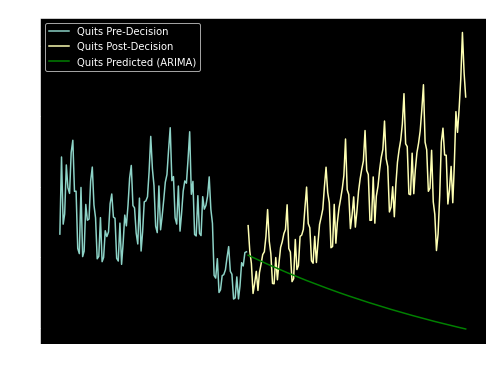

In [29]:
y_pred = ARIMAmodel.get_model_vals(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 

y_pred_df["Predictions"] = ARIMAmodel.predict(start=y_pred_df.index[0], end=y_pred_df.index[-1])
y_pred_df.index = test.index

y_pred_out = y_pred_df["Predictions"] 

# Plotting actual and predicted Job Quits
f, ax = plt.subplots(figsize=(8,6))
ax.plot(x, label='Quits Pre-Decision')
ax.plot(y, label='Quits Post-Decision')
ax.plot(y_pred_out, color='green', label='Quits Predicted (ARIMA)')
# ax.fill_between(y_pred_df['Predictions'], y_pred_df['lower total_quits'], y_pred_df['upper total_quits'])
ax.legend()

ax.set_ylabel('Job Quits (millions)', fontsize=16)

fig_path = os.path.join('.', 'img', 'arima_job_quits_predict.png')
f.savefig(fig_path)

In [24]:
# Calulating error between predicted and actual quits
mae = np.sum(y_pred_out - post_decision['total_quits']) / len(y_pred_out)
std_error = np.sqrt(np.sum((y_pred_out - post_decision['total_quits'])**2) / len(y_pred_out))
print(f'Mean Absolute Error: {round(abs(mae))} jobs')
print(f'Standard Error: {std_error}')

residuals = y_pred_out - post_decision.total_quits
std_residuals = np.std(residuals)

print(f'Mean Residual: {abs(np.mean(residuals))}')
print(f'Std Dev Residuals: {std_residuals}')


Mean Absolute Error: 1383743 jobs
Standard Error: 1702394.8794669716
Mean Residual: 1383742.8143916298
Std Dev Residuals: 991667.3581674941


In [25]:
from statsmodels.tsa.stattools import grangercausalitytests

In [26]:
# Using a Granger Causality Test
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.grangercausalitytests.html
gdf = pd.merge(y_pred_df, post_decision, how='left', left_index=True, right_index=True)
gdf = gdf[['total_quits', 'Predictions']]

In [27]:
gdf.head()


,total_quits,Predictions
date,,
2010-08-01,2451000,2.031610e+06
2010-09-01,2090000,2.020671e+06
2010-10-01,1914000,2.009791e+06
2010-11-01,1489000,1.998970e+06
2010-12-01,1633000,1.988208e+06


In [46]:
results = grangercausalitytests(gdf, 10)
print(results)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=18.7211 , p=0.0000  , df_denom=131, df_num=1
ssr based chi2 test:   chi2=19.1498 , p=0.0000  , df=1
likelihood ratio test: chi2=17.8993 , p=0.0000  , df=1
parameter F test:         F=18.7211 , p=0.0000  , df_denom=131, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.7731  , p=0.0003  , df_denom=129, df_num=2
ssr based chi2 test:   chi2=18.0902 , p=0.0001  , df=2
likelihood ratio test: chi2=16.9612 , p=0.0002  , df=2
parameter F test:         F=12.5156 , p=0.0000  , df_denom=129, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=7.0382  , p=0.0002  , df_denom=127, df_num=3
ssr based chi2 test:   chi2=21.9458 , p=0.0001  , df=3
likelihood ratio test: chi2=20.3014 , p=0.0001  , df=3
parameter F test:         F=14.6687 , p=0.0000  , df_denom=127, df_num=2

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=7.2178  , p=0.0000  

/Users/andrewbowen/sideProjects/greatResignation/env/lib/python3.7/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  'rank is %d' % (J, J_), ValueWarning)
/Users/andrewbowen/sideProjects/greatResignation/env/lib/python3.7/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 2
  'rank is %d' % (J, J_), ValueWarning)
/Users/andrewbowen/sideProjects/greatResignation/env/lib/python3.7/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 2
  'rank is %d' % (J, J_), ValueWarning)
/Users/andrewbowen/sideProjects/greatResignation/env/lib/python3.7/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6

In [45]:
# Checking model accurracy, used tutorial below:
# https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
def model_accuracy(model_vals, actual):
    mape = np.mean(np.abs(model_vals - actual)/np.abs(actual))
    me = np.mean(model_vals - actual)
    mae = np.mean(np.abs(model_vals - actual))
    mpe = np.mean((model_vals - actual)/actual)
    rmse = np.mean((model_vals - actual)**2)**0.5
    corr = np.corrcoef(model_vals, actual)[0,1]
    mins = np.amin(np.hstack([model_vals.values[:,None], 
                              actual.values[:,None]]), axis=1)
    maxs = np.amax(np.hstack([model_vals.values[:,None], 
                              actual.values[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)

    return mape, me, mae, mpe, rmse, corr, minmax

mape, me, mae, mpe, rmse, corr, minmax = model_accuracy(y_pred_out, gdf.total_quits)

print(f"Mean Average Percent Error: {round(100 * mape, 2)}%")
print(f"Mean Average Error: {mae}")
print(f"Roost Mean-Square Error (RMSE): {rmse}")




Mean Average Percent Error: 45.1%
Mean Average Error: 1421779.662461334
Roost Mean-Square Error (RMSE): 1702394.8794669716
